In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import keras.backend as K
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

/home/wazir/.virtualenvs/wazir/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.models import load_model
from keras.models import Sequential, Model
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Input, Merge, ZeroPadding2D, merge
from keras.preprocessing import image
from scipy.misc import imsave, imread, imresize, toimage
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils.data_utils import get_file
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

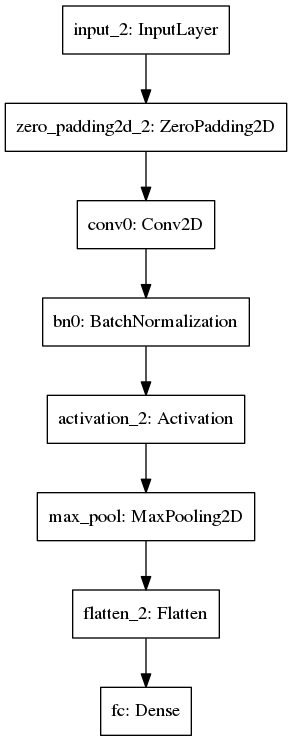

In [3]:
from IPython.display import Image
Image('VDSR.png')

In [4]:
input_shape = (64,64,3) #IMAGE PATCH SIZE IS 41 BY 41
#input_img = Input(shape=input_shape)
X_input = Input(input_shape)
# Zero-Padding: pads the border of X_input with zeroes
X = ZeroPadding2D((3, 3))(X_input)

In [5]:
# CONV -> BN -> RELU Block applied to X
X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
X = BatchNormalization(axis = 3, name = 'bn0')(X)
X = Activation('relu')(X)

# MAXPOOL
X = MaxPooling2D((2, 2), name='max_pool')(X)

# FLATTEN X (means convert it to a vector) + FULLYCONNECTED
X = Flatten()(X)
X = Dense(1, activation='sigmoid', name='fc')(X)

# Create model. This creates our Keras model instance, you’ll use this 
model = Model(inputs = X_input, outputs = X, name='HappyModel')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
__________

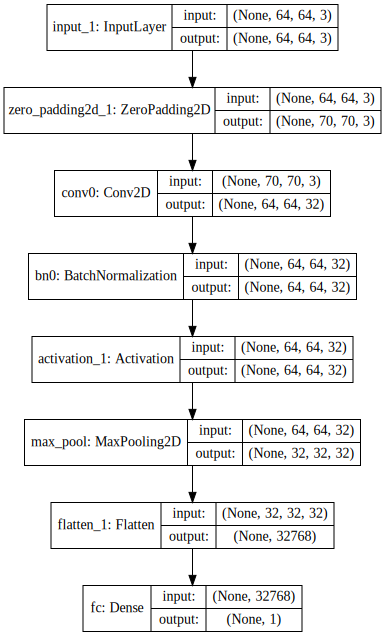

In [6]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [7]:
plot_model(model, to_file='VDSR.png')